# Day and Night Image Classifier

- Dataset : day/night rgb image, 200 day images, 200 night images 
- Goal : 두 종류(day/night)의 이미지에서 day와 night만의 구별된 특징을 찾아 분류
- [Amos Dataset](http://mvrl.cs.uky.edu/datasets/amos/)
- 입력(Input) -> 탐색(Visualize) -> 전처리(Preprocessing) -> 특성추출(Feature Extraction) -> 분류(Classify)-> 테스트(Accuracy)

## Import Resources

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob

## 입력(Input)

In [2]:
!dir "./day_night_images/"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2EC3-9F2C

 C:\Users\Playdata\Documents\Computer Vision\workshop\day_night_images 디렉터리

2022-01-12  오후 01:48    <DIR>          .
2022-01-12  오후 01:48    <DIR>          ..
2022-01-12  오후 01:48    <DIR>          test
2022-01-12  오후 01:48    <DIR>          training
               0개 파일                   0 바이트
               4개 디렉터리  141,090,074,624 바이트 남음


### Training and Testing Data

In [3]:
image_dir_training = "./day_night_images/training"
image_dir_test = "./day_night_images/test"

In [18]:
train_images = glob.glob("./day_night_images/training/*/*.jpg")
test_images = glob.glob("./day_night_images/test/*/*.jpg")
print("for train:", len(train_images), "   for test:", len(test_images))
train_images[:3]

for train: 240    for test: 160


['./day_night_images/training\\day\\20151101_142050.jpg',
 './day_night_images/training\\day\\20151101_145049.jpg',
 './day_night_images/training\\day\\20151101_145511.jpg']

In [20]:
train_day_images = glob.glob("./day_night_images/training/day/*.jpg")
train_night_images = glob.glob("./day_night_images/training/night/*.jpg")
print("for day(train):", len(train_day_images), "   for night(train):", len(train_night_images))

for day(train): 120    for night(train): 120


In [21]:
test_day_images = glob.glob("./day_night_images/test/day/*.jpg")
test_night_images = glob.glob("./day_night_images/test/night/*.jpg")
print("for day(test):", len(test_day_images), "   for night(test):", len(test_night_images))

for day(test): 80    for night(test): 80


## 탐색(Visualize)

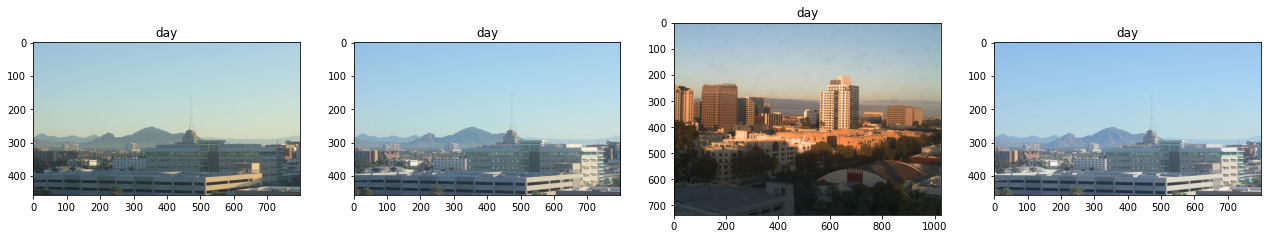

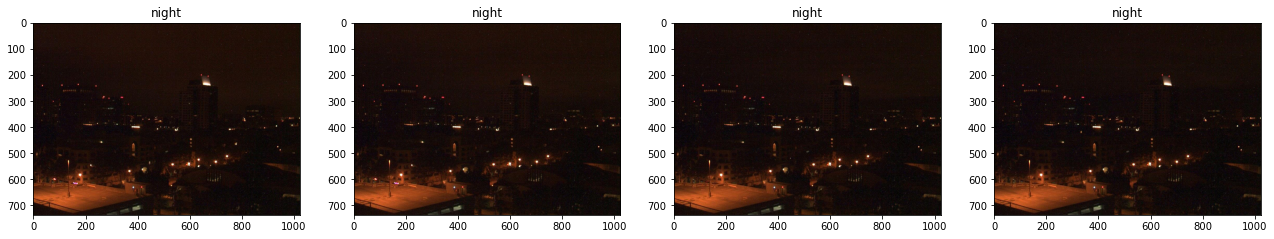

In [32]:
# 첫 4장 이미지 보기
figure, axes = plt.subplots(nrows=1 , ncols=4, figsize=(22, 6))
for i, day_image in enumerate(train_day_images[:4]):
    image = mpimg.imread(day_image)
    axes[i].imshow(image)
    axes[i].set_title("day")

figure, axes = plt.subplots(nrows=1 , ncols=4, figsize=(22, 6))    
for i, night_image in enumerate(train_night_images[:4]):
    image = mpimg.imread(night_image)
    axes[i].imshow(image)
    axes[i].set_title("night")

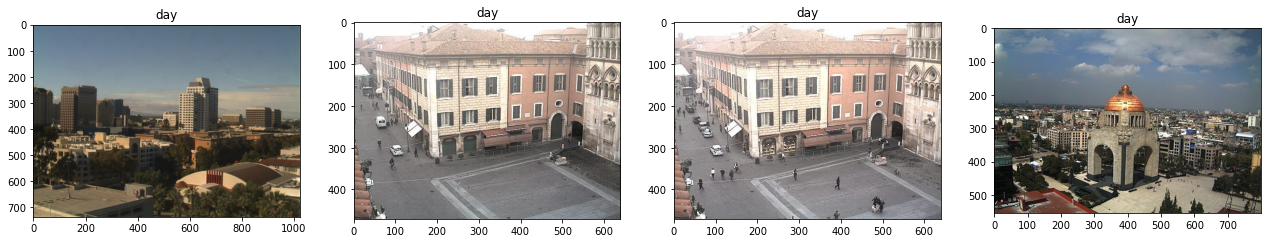

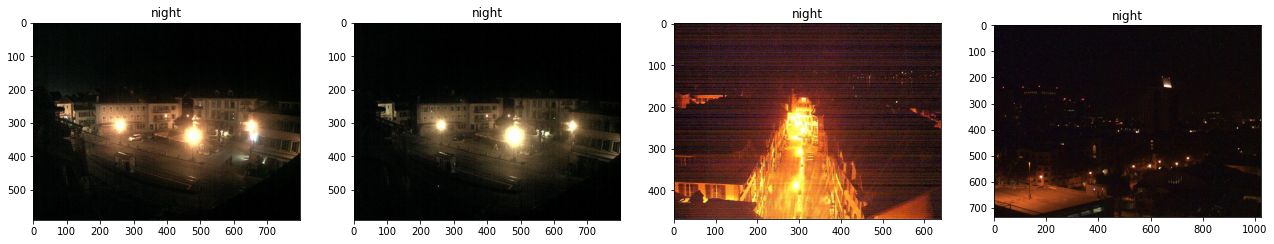

In [36]:
# random하게 4장 이미지 보기
figure, axes = plt.subplots(nrows=1 , ncols=4, figsize=(22, 6))
for i in range(4):
    rand_i = np.random.randint(0, len(train_day_images))
    image = mpimg.imread(train_day_images[rand_i])
    axes[i].imshow(image)
    axes[i].set_title("day")

figure, axes = plt.subplots(nrows=1 , ncols=4, figsize=(22, 6))    
for i in range(4):
    rand_i = np.random.randint(0, len(train_night_images))
    image = mpimg.imread(train_night_images[rand_i])
    axes[i].imshow(image)
    axes[i].set_title("night")

## 전처리(Preprocessing)

### 데이터 적재

In [52]:
import os

In [56]:
def load_dataset(image_dir):
    image_list = []
    image_types = ["day", "night"]

    for image_type in image_types:
        file_paths = glob.glob(os.path.join(image_dir, image_type, '*.jpg'))
        for file in file_paths:
            image = mpimg.imread(file)
            image_list.append((image, image_type))
            
    return image_list

In [69]:
train_image_list = load_dataset(image_dir_training) 
test_image_list = load_dataset(image_dir_test) 

print(len(train_image_list), len(test_image_list))
print("image shape:", train_image_list[0][0].shape, "  image label:", train_image_list[0][1])

240 160
image shape: (458, 800, 3)   image label: day


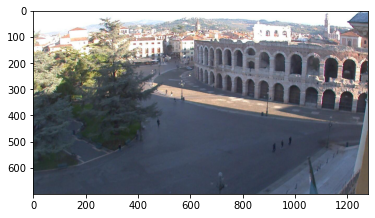

In [68]:
plt.imshow(train_image_list[50][0])

### 표준화 (Resize, Label Encoding)

In [87]:
def resize_input(image):
    resized_image = cv2.resize(image, (1200, 600))
    return resized_image

def label_encode(label):
    val = 0
    if label == "day":
        val = 1
    else:
        val = 0
    return val

In [88]:
def standardized(image_list):
    standard_list = []

    for item in image_list: 
        image = item[0]
        label = item[1]

        standard_image = resize_input(image)
        standard_label = label_encode(label)

        standard_list.append([standard_image, standard_label])
    return standard_list
    

In [89]:
standardized_train_list = standardized(train_image_list) # 240 elements
standardized_test_list = standardized(test_image_list) # 160 elements

In [90]:
print(len(standardized_train_list), len(standardized_test_list))
print("image shape:", standardized_train_list[0][0].shape, "  image label:", standardized_train_list[0][1])

240 160
image shape: (600, 1200, 3)   image label: 1


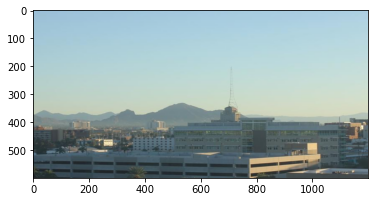

In [91]:
plt.imshow(standardized_train_list[0][0])

## 특성추출(Feature Extraction)

average brightness: 145.63849305555556


Text(0.5, 1.0, 'v channel')

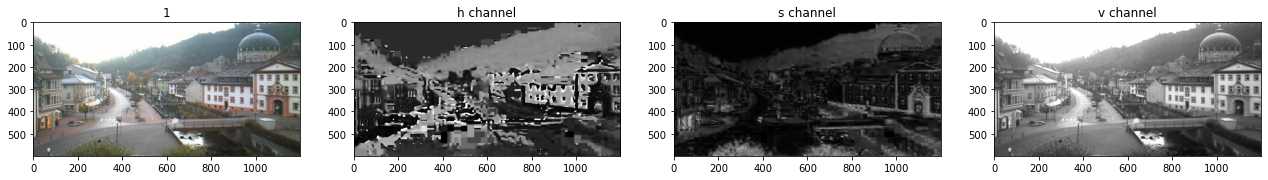

In [112]:
index = 30
test_image = standardized_train_list[index][0]
test_label = standardized_train_list[index][1]

hsv = cv2.cvtColor(test_image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

print("average brightness:", np.sum(v)/(v.shape[0]*v.shape[1]))

figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(22,6))

axes[0].imshow(test_image)
axes[0].set_title(test_label)

axes[1].imshow(h, cmap='gray')
axes[1].set_title("h channel")

axes[2].imshow(s, cmap="gray")
axes[2].set_title("s channel")

axes[3].imshow(v, cmap='gray')
axes[3].set_title("v channel")


In [109]:
def average_brightness(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    avg_brightness = np.sum(v)/(v.shape[0]*v.shape[1])
    return avg_brightness

## 분류(Classify) 
- 평균 밝기값을 기준으로 day 또는 night 인지를 예측

In [138]:
def predict_label(image):
    avg = average_brightness(image)
    
    predicted_label = 0
    threshold = 99  # 기준 밝기값
    if avg > threshold:
        predicted_label = 1 # day
    else:
        predicted_label = 0 # night
        
    return predicted_label

## 테스트 (Measure Accuracy)

In [139]:
missclassified_list = []

for item in standardized_test_list:
    image = item[0] # image
    label = item[1] # true label
    
    predict =  predict_label(image)
    
    if (label != predict ):
        missclassified_list.append([image, predict, label])

In [140]:
total = len(standardized_test_list)
miss = len(missclassified_list)
correct = total - miss
accuracy = correct/total
print("Accuracy:", accuracy)

Accuracy: 0.9375


### 잘못 분류된 이미지 시각화 하기

[0] average brightness: 93.18199444444444
[1] average brightness: 116.52359305555555
[2] average brightness: 98.88646944444444
[3] average brightness: 106.49033333333334


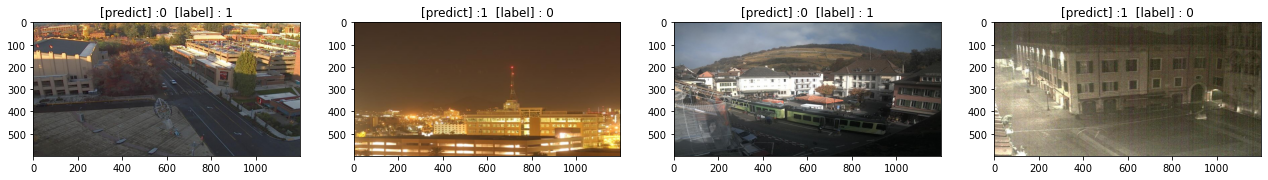

In [143]:
# random하게 4장 이미지 보기
figure, axes = plt.subplots(nrows=1 , ncols=4, figsize=(22, 6))
for i in range(4):
    rand_i = np.random.randint(0, len(missclassified_list))
    image = missclassified_list[rand_i][0]
    predict = missclassified_list[rand_i][1]
    label = missclassified_list[rand_i][2]
    
    axes[i].imshow(image)
    axes[i].set_title("[predict] :" + str(predict) + "  [label] : " + str(label))
    print([i], "average brightness:", average_brightness(image))